1.Data Preparation & Feature Engineering

Load and Explore:
1. Load data
2. Clean CustomerID and handle missing values
3. Feature engineering (e.g., InvoiceDate → Recency)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

df = pd.read_csv("C:\Python\ML\Online Retail.xlsx - Online Retail.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/Online Retail.xlsx - Online Retail.csv'

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


Clean Data:


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df.shape

(401604, 8)

In [ ]:
#Convert Excel serial date (if InvoiceDate is in numeric format)

if pd.api.types.is_numeric_dtype(df['InvoiceDate']):
    df['InvoiceDate'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df['InvoiceDate'], unit='D')
df['InvoiceDate']

,InvoiceDate
0,12/1/10 8:26
1,12/1/10 8:26
2,12/1/10 8:26
3,12/1/10 8:26
4,12/1/10 8:26
...,...
541904,12/9/11 12:50
541905,12/9/11 12:50
541906,12/9/11 12:50
541907,12/9/11 12:50


In [ ]:
#Remove rows where Quantity or UnitPrice is negative or zero
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [ ]:
#Remove cancellations (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [ ]:
#Convert InvoiceDate to datetime (handle Excel serial format if needed)
if pd.api.types.is_numeric_dtype(df['InvoiceDate']):
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], unit='D', origin='1899-12-30')
else:
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate']

<ipython-input-14-d221a34f3718>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00
...,...
541904,2011-12-09 12:50:00
541905,2011-12-09 12:50:00
541906,2011-12-09 12:50:00
541907,2011-12-09 12:50:00


Create RFM Features:

RFM Calculation
1. Compute Recency, Frequency, Monetary values
2. Create the RFM dataframe

In [ ]:
#Create RFM Features
reference_date = df['InvoiceDate'].max() + timedelta(days=1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'CustomerID': 'count'
})
rfm

,InvoiceDate,InvoiceNo,CustomerID
CustomerID,,,
12346.0,326,1,1
12347.0,2,7,182
12348.0,75,4,31
12349.0,19,1,73
12350.0,310,1,17
...,...,...,...
18280.0,278,1,10
18281.0,181,1,7
18282.0,8,2,12


In [ ]:
monetary = df.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())
rfm['Monetary'] = monetary
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency'
}, inplace=True)

rfm['Monetary']
monetary

<ipython-input-17-ded506f111ae>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monetary = df.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())


,0
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,178.05


In [ ]:
#Standardize Feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled = pd.DataFrame(rfm_scaled, index=rfm.index, columns=rfm.columns)
rfm_scaled

,Recency,Frequency,CustomerID,Monetary
CustomerID,,,,
12346.0,2.334574,-0.425097,-0.397035,8.363010
12347.0,-0.905340,0.354417,0.405694,0.251699
12348.0,-0.175360,-0.035340,-0.263986,-0.027988
12349.0,-0.735345,-0.425097,-0.077717,-0.032406
12350.0,2.174578,-0.425097,-0.326075,-0.190812
...,...,...,...,...
18280.0,1.854587,-0.425097,-0.357120,-0.207931
18281.0,0.884612,-0.425097,-0.370425,-0.219037
18282.0,-0.845342,-0.295178,-0.348250,-0.208214


Optional Challenge:

In [ ]:
print(rfm.head())

            Recency  Frequency  CustomerID  Monetary
CustomerID                                          
12346.0         326          1           1  77183.60
12347.0           2          7         182   4310.00
12348.0          75          4          31   1797.24
12349.0          19          1          73   1757.55
12350.0         310          1          17    334.40


In [ ]:
print(rfm_scaled.head())

             Recency  Frequency  CustomerID  Monetary
CustomerID                                           
12346.0     2.334574  -0.425097   -0.397035  8.363010
12347.0    -0.905340   0.354417    0.405694  0.251699
12348.0    -0.175360  -0.035340   -0.263986 -0.027988
12349.0    -0.735345  -0.425097   -0.077717 -0.032406
12350.0     2.174578  -0.425097   -0.326075 -0.190812


2. MODELING & VISUALIZATION

K-Means Clustering
1. Elbow Method plot
2. Fitting KMeans and assigning clusters

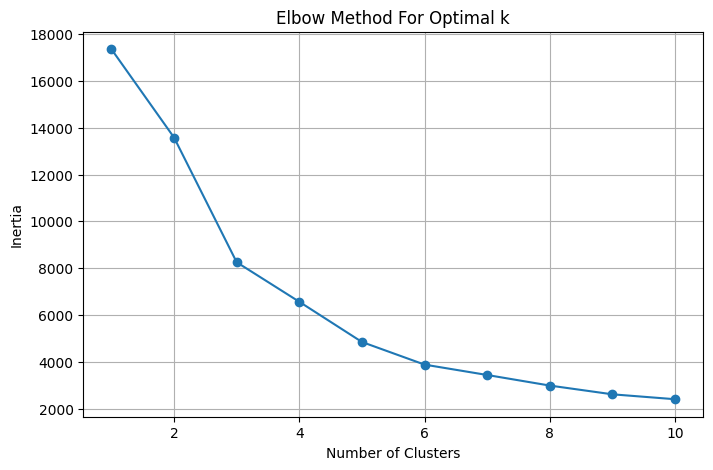

In [ ]:
#K-mean clustring
#cluster customer and visualize segments
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)
rfm['Cluster'] = kmeans.labels_
rfm

,Recency,Frequency,CustomerID,Monetary,Cluster
CustomerID,,,,,
12346.0,326,1,1,77183.60,1
12347.0,2,7,182,4310.00,0
12348.0,75,4,31,1797.24,0
12349.0,19,1,73,1757.55,0
12350.0,310,1,17,334.40,1
...,...,...,...,...,...
18280.0,278,1,10,180.60,1
18281.0,181,1,7,80.82,1
18282.0,8,2,12,178.05,0


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm['Cluster']

,Cluster
CustomerID,
12346.0,1
12347.0,0
12348.0,0
12349.0,0
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,0


In [ ]:
print(rfm.groupby('Cluster').mean())

            Recency   Frequency   CustomerID       Monetary
Cluster                                                    
0         40.600810    4.796198   100.838891    1923.922232
1        244.376014    1.571686    27.285843     618.929613
2          6.941176   50.823529  1240.117647  106450.900588
3          1.333333  178.000000  5919.333333   72428.066667


PCA for Visualization:

PCA for Visualization
1. 2D reduction
2. PCA scatter plot colored by clusters

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)
rfm_pca = pd.DataFrame(rfm_pca, columns=['PC1','PC2'], index=rfm.index)
rfm_pca

,PC1,PC2
CustomerID,,
12346.0,2.941133,4.556989
12347.0,0.809042,-0.712418
12348.0,-0.139144,-0.205073
12349.0,-0.123487,-0.750125
12350.0,-1.113903,1.935216
...,...,...
18280.0,-1.054999,1.623765
18281.0,-0.810607,0.700011
18282.0,-0.254699,-0.922873


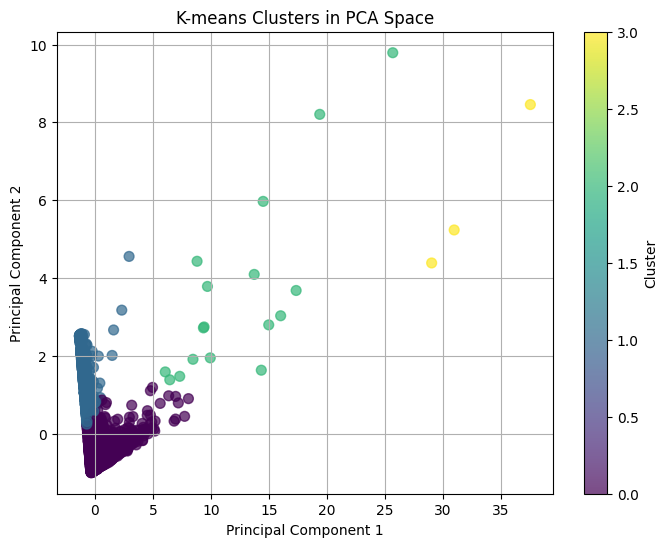

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(rfm_pca['PC1'], rfm_pca['PC2'], c=rfm['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clusters in PCA Space')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

Optional Challenge:

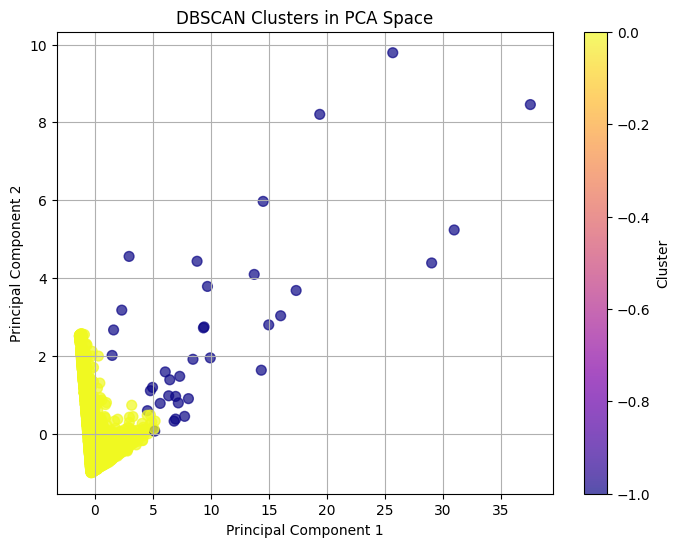

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.2, min_samples=5)
rfm['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)

plt.figure(figsize=(8,6))
plt.scatter(rfm_pca['PC1'], rfm_pca['PC2'], c=rfm['DBSCAN_Cluster'], cmap='plasma', s=50, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clusters in PCA Space')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

3.EVALUATION & INTERPERTATION

Cluster Evaluation
1. Silhouette score
2. (Optional) Davies-Bouldin Index

In [ ]:
#Evaluate Clustering
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(rfm_scaled, rfm['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.537


Interpet Clusters:

Interpretation
1. Cluster summaries
2. Boxplots of Recency, Frequency, Monetary by cluster
3. Labeling clusters with business-friendly names

In [ ]:
print(rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean())

            Recency   Frequency       Monetary
Cluster                                       
0         40.600810    4.796198    1923.922232
1        244.376014    1.571686     618.929613
2          6.941176   50.823529  106450.900588
3          1.333333  178.000000   72428.066667


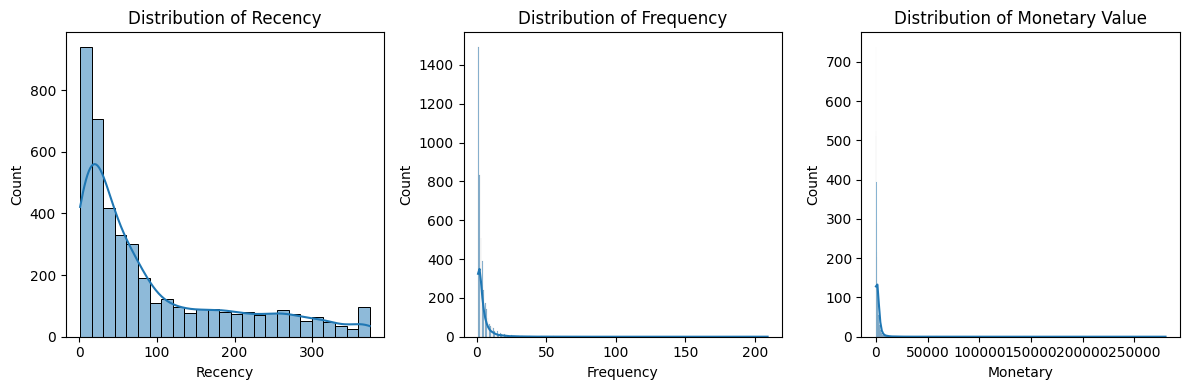

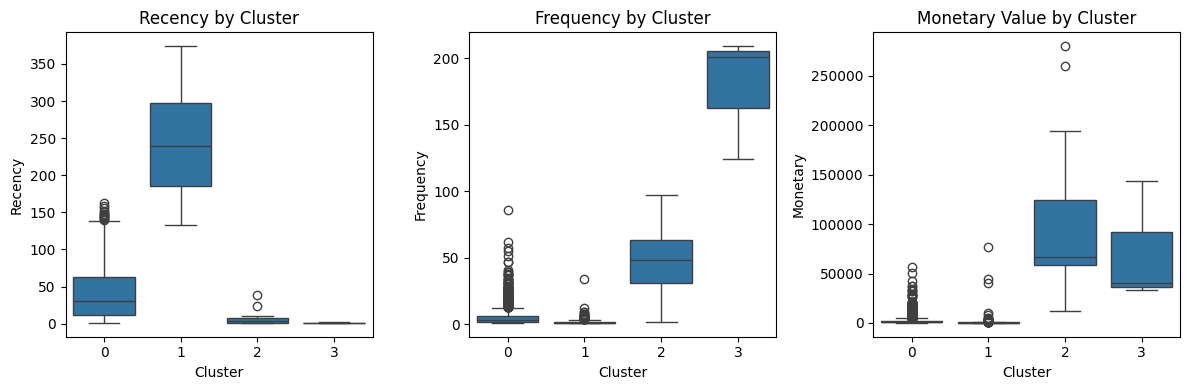

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of RFM features
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], kde=True)
plt.title('Distribution of Recency')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], kde=True)
plt.title('Distribution of Frequency')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], kde=True)
plt.title('Distribution of Monetary Value')

plt.tight_layout()
plt.show()

# Boxplots for RFM features by cluster
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='Recency', data=rfm)
plt.title('Recency by Cluster')

plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Frequency', data=rfm)
plt.title('Frequency by Cluster')

plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='Monetary', data=rfm)
plt.title('Monetary Value by Cluster')

plt.tight_layout()
plt.show()

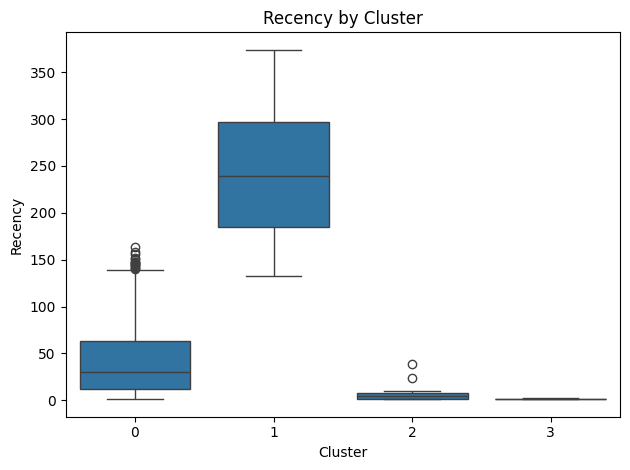

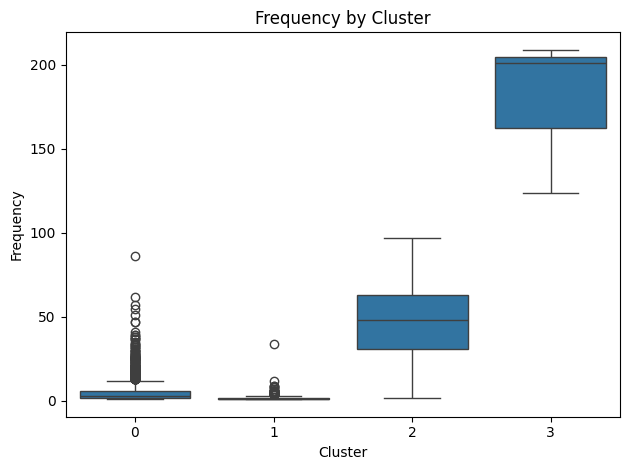

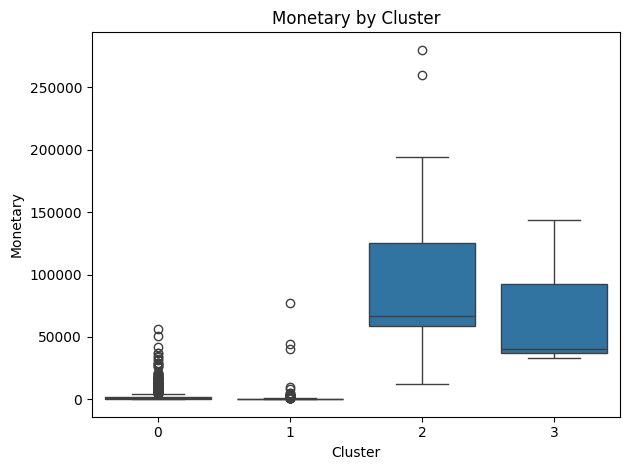

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Recency by Cluster
sns.boxplot(x='Cluster', y='Recency', data=rfm)
plt.title('Recency by Cluster')
plt.tight_layout()
plt.show()

#Frequency by Cluster
sns.boxplot(x='Cluster', y='Frequency', data=rfm)
plt.title('Frequency by Cluster')
plt.tight_layout()
plt.show()

#Monetary by Cluster
sns.boxplot(x='Cluster', y='Monetary', data=rfm)
plt.title('Monetary by Cluster')
plt.tight_layout()
plt.show()

In [ ]:
cluster_labels = {
    0: "Loyal High-Value",
    1: "Inactive Low-Spenders",
    2: "Recent Low-Value",
    3: "Frequent Moderate"
}
rfm['Segment'] = rfm['Cluster'].map(cluster_labels)
rfm['Segment']

,Segment
CustomerID,
12346.0,Inactive Low-Spenders
12347.0,Loyal High-Value
12348.0,Loyal High-Value
12349.0,Loyal High-Value
12350.0,Inactive Low-Spenders
...,...
18280.0,Inactive Low-Spenders
18281.0,Inactive Low-Spenders
18282.0,Loyal High-Value


Business Recommendations:

Recommendations
1. Marketing actions per segment
2. Metrics to track

In [ ]:
# prompt:  Business Recommendations i want theory concept
# Business Recommendations based on Customer Segmentation

# 1. Targeted Marketing Campaigns:
# For each segment, tailor marketing messages and channels.
#  - Loyal High-Value: Exclusive offers, loyalty programs, early access to new products, personalized recommendations.
#  - Inactive Low-Spenders: Win-back campaigns, special promotions, reactivation incentives, personalized product suggestions.
#  - Recent Low-Value: Promotions for repeat purchases, product bundles, discounts, cross-selling opportunities.
#  - Frequent Moderate: Product recommendations, bundle deals, loyalty program enrollment, personalized offers.

# 2. Personalized Product Recommendations:
# Leverage purchase history and segment characteristics to suggest products.
#  - Loyal High-Value: Recommend premium products, complementary items, new arrivals.
#  - Inactive Low-Spenders: Suggest products similar to past purchases, best-sellers, or products in related categories.
#  - Recent Low-Value: Recommend products that have a higher conversion rate or are currently on sale.
#  - Frequent Moderate: Recommend products based on their past purchases, offering related items.

# 3. Inventory Management:
# Adjust inventory levels based on predicted demand from different segments.
#  - High-Value customers may have specific needs. Ensuring sufficient stock of their preferred items is crucial.
#  - Inactive customers may require more targeted inventory that could entice them back.
#  - Recent or Frequent customers may indicate product popularity and suggest inventory replenishment.

# 4. Pricing Strategies:
# Differentiate pricing based on segment value.
#  - Offer discounts and promotions to inactive or low-value customers to encourage engagement.
#  - Higher prices may be tolerated by high-value customers who expect premium service.

# 5. Customer Service:
# Provide tailored customer service based on segment needs.
#  - Loyal customers might appreciate personalized attention and proactive support.
#  - Inactive customers require extra attention to address their concerns and win them back.

# 6. Churn Prediction:
# Monitor the trends for each customer segment to identify those at risk of churning. Implement targeted strategies to retain them.

# 7. Customer Lifetime Value (CLTV) Analysis:
# Predict the CLTV for each customer segment, and focus resources on segments with the highest CLTV potential.
# Optimize marketing efforts to maximize return on investment.

# 8. Website Personalization:
# Personalize the website experience for each segment, presenting relevant product categories and promotions.
#  - Loyal customers could benefit from exclusive content and personalized recommendations.

# Example Implementation (Illustrative):
# Assume 'rfm' DataFrame has 'Segment' column (as created in the code)

# for segment, data in rfm.groupby('Segment'):
#     print(f"Recommendations for segment '{segment}':")
#     if segment == 'Loyal High-Value':
#         print("  - Implement loyalty program.")
#         # ... other recommendations ...
#     elif segment == 'Inactive Low-Spenders':
#         print("  - Send win-back emails.")
#         # ... other recommendations ...
#     # Add recommendations for other segments

# This is a starting point. Further analysis and experimentation are required.

In [ ]:
# Sample segment-based strategy ideas:
#  - "Loyal High-Value": Offer exclusive rewards, referral bonuses
#  - "Inactive Low-Spenders": Send re-engagement campaigns, discounts
#  - "Frequent Moderate": Encourage upselling, bundle offers

print(rfm['Segment'].value_counts())

Segment
Loyal High-Value         3209
Inactive Low-Spenders    1109
Recent Low-Value           17
Frequent Moderate           3
Name: count, dtype: int64


Optional Challenge:

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(rfm_scaled, rfm['Cluster'])
print(f'Davies-Bouldin Index: {db_score:.3f} (lower is better)')

Davies-Bouldin Index: 0.698 (lower is better)


In [ ]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [ ]:
# The line `joblib.dump(kmeans, 'kmeans_model.pkl')` saves the trained KMeans model object
# to a file named 'kmeans_model.pkl'.

# Theory Explanation:

# Joblib is a library in Python that provides utilities for efficient saving and loading
# of Python objects, especially large NumPy arrays and scikit-learn models.  It's often
# preferred over pickle for large data structures due to better performance.

# In this specific case:

# 1. `kmeans`: This variable holds the trained KMeans model. The KMeans algorithm has been
#    fitted to your scaled RFM data (Recency, Frequency, Monetary value).  The `fit()` method
#    learns the optimal cluster centers based on the data.  The `kmeans` object now contains
#    all the information needed to assign new data points to clusters.

# 2. `joblib.dump()`: This function serializes the `kmeans` object.  Serialization is the
#    process of converting a complex object into a byte stream that can be stored in a file.
#    Joblib handles this process efficiently, especially when the object contains large
#    numerical arrays.

# 3. `'kmeans_model.pkl'`: This is the filename where the serialized model will be saved.
#    The '.pkl' extension is commonly used for files containing pickled or serialized objects.

# Why save the model?

# * **Reusability:** You can load the model later without retraining it. This saves significant
#   time and computational resources, especially with large datasets and computationally
#   intensive models.
# * **Deployment:** The saved model can be deployed in a production environment (e.g., a web
#   application) to perform clustering on new customer data.
# * **Sharing:**  You can share the saved model with colleagues or collaborators who can then
#   use it without needing the original code.


# How to load the saved model (example):

# kmeans_loaded = joblib.load('kmeans_model.pkl')
# new_customer_data = ... # New data you want to cluster
# predicted_cluster = kmeans_loaded.predict(new_customer_data)

In [ ]:
# Include DBSCAN results or a saved model 3 (joblib.dump(kmeans, 'kmeans_model.pkl')) in a subfolder (YourName_Extra).

import joblib
import os

# Create the subfolder if it doesn't exist
folder_name = "Palanikumaran_Extra"  # Replace with your actual name
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Save the kmeans model to the subfolder
kmeans_filepath = os.path.join(folder_name, 'kmeans_model.pkl')
joblib.dump(kmeans, kmeans_filepath)

# Save the DBSCAN model (replace 'dbscan' with your actual DBSCAN model variable)
dbscan_filepath = os.path.join(folder_name, 'dbscan_model.pkl')
joblib.dump(dbscan, dbscan_filepath)

['Palanikumaran_Extra/dbscan_model.pkl']